In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import seaborn as sns 

In [3]:
plt.style.use('tableau-colorblind10')

In [4]:
df=pd.read_csv("titanic_train.csv")

In [5]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [6]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [8]:
x=df.drop(columns=["Survived"])
y=df["Survived"]

Text(0.5, 1.0, 'Survival Count')

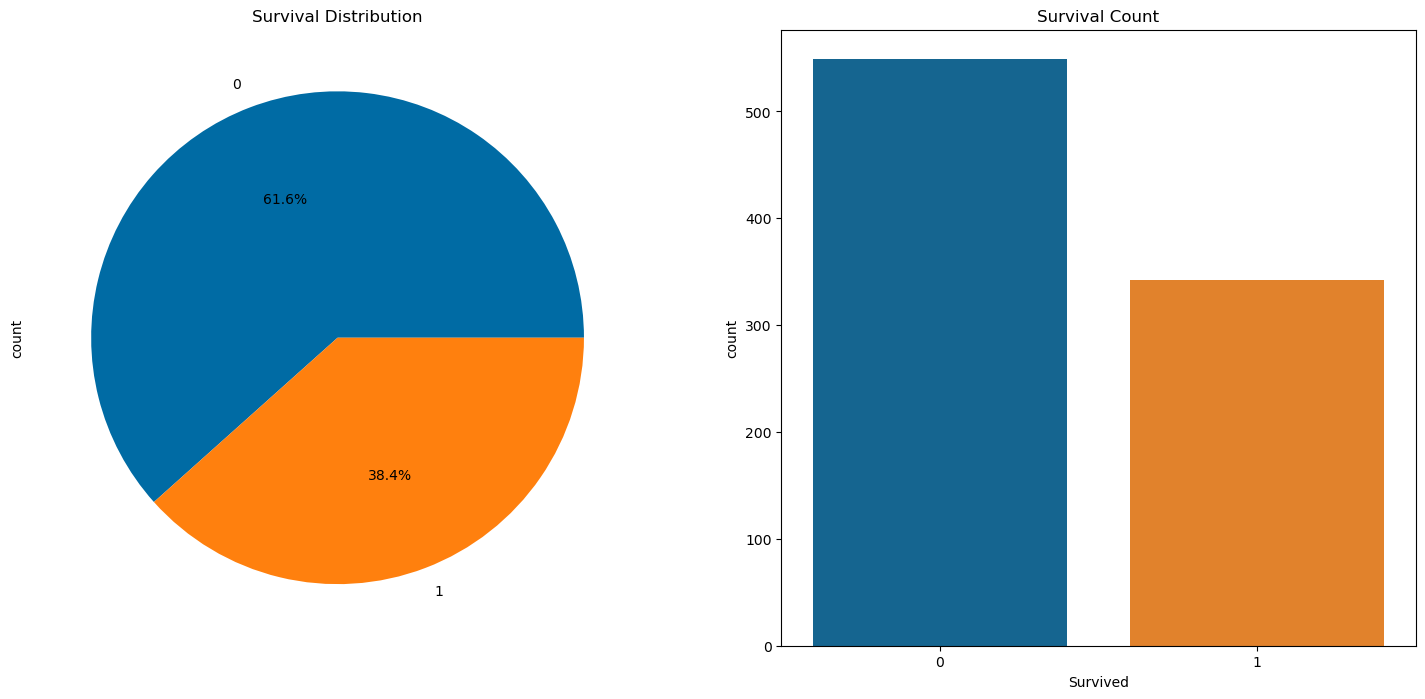

In [9]:
f,ax=plt.subplots(1,2,figsize=(18,8))
df['Survived'].value_counts().plot.pie(autopct='%1.1f%%',ax=ax[0])
ax[0].set_title('Survival Distribution')

sns.countplot(x="Survived",data=df,ax=ax[1])
ax[1].set_title('Survival Count')


catagorical columns 

In [10]:
df.groupby(['Sex','Survived'])["Sex"].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Sex, dtype: int64

In [11]:
df[['Sex','Survived']].groupby(['Sex']).count()


,Survived
Sex,
female,314
male,577


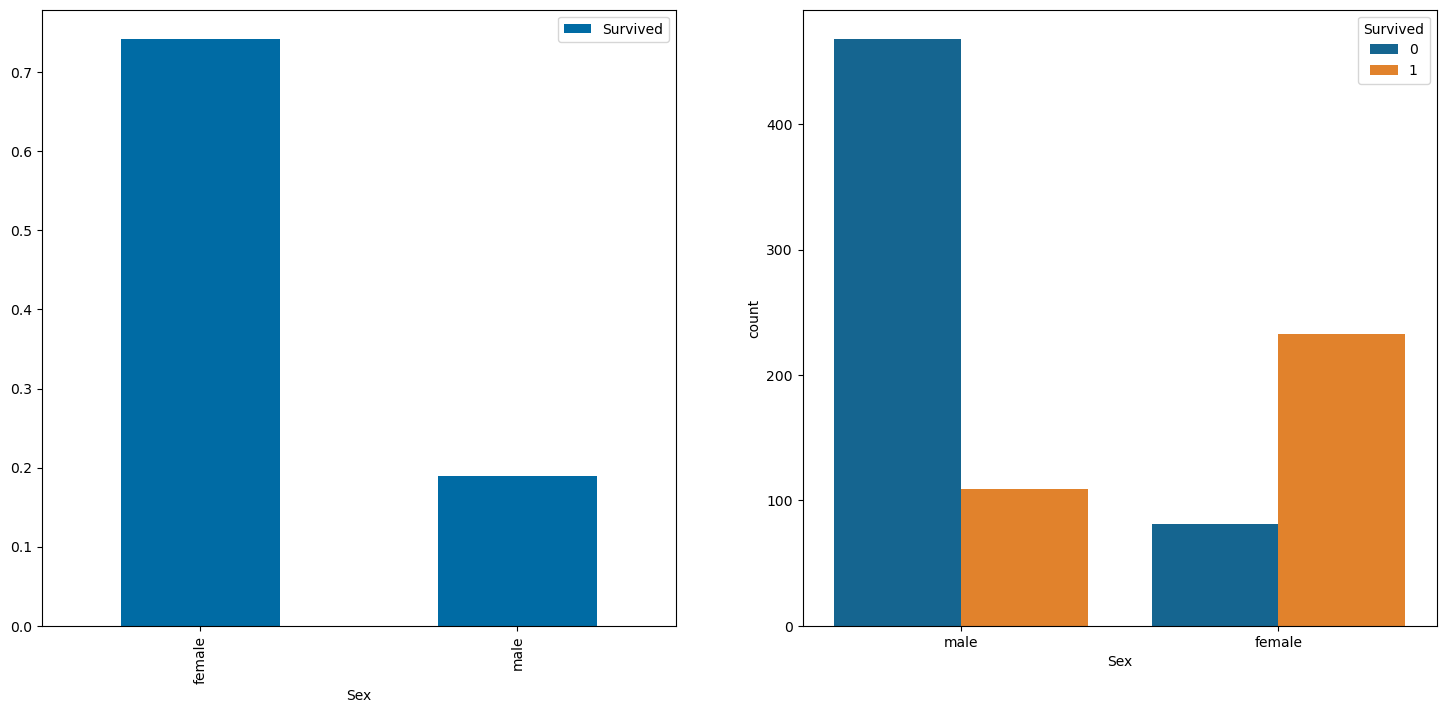

In [12]:
f,ax=plt.subplots(1,2,figsize=(18,8))

df[['Sex','Survived']].groupby(['Sex']).mean().plot.bar(ax=ax[0])

sns.countplot(x='Sex',hue='Survived',data=df,ax=ax[1])
plt.show()

pclass ordinal feature


In [13]:
pd.crosstab(df.Pclass,df.Survived,margins=True).style.background_gradient(cmap='summer_r')



Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


<Axes: xlabel='Pclass', ylabel='count'>

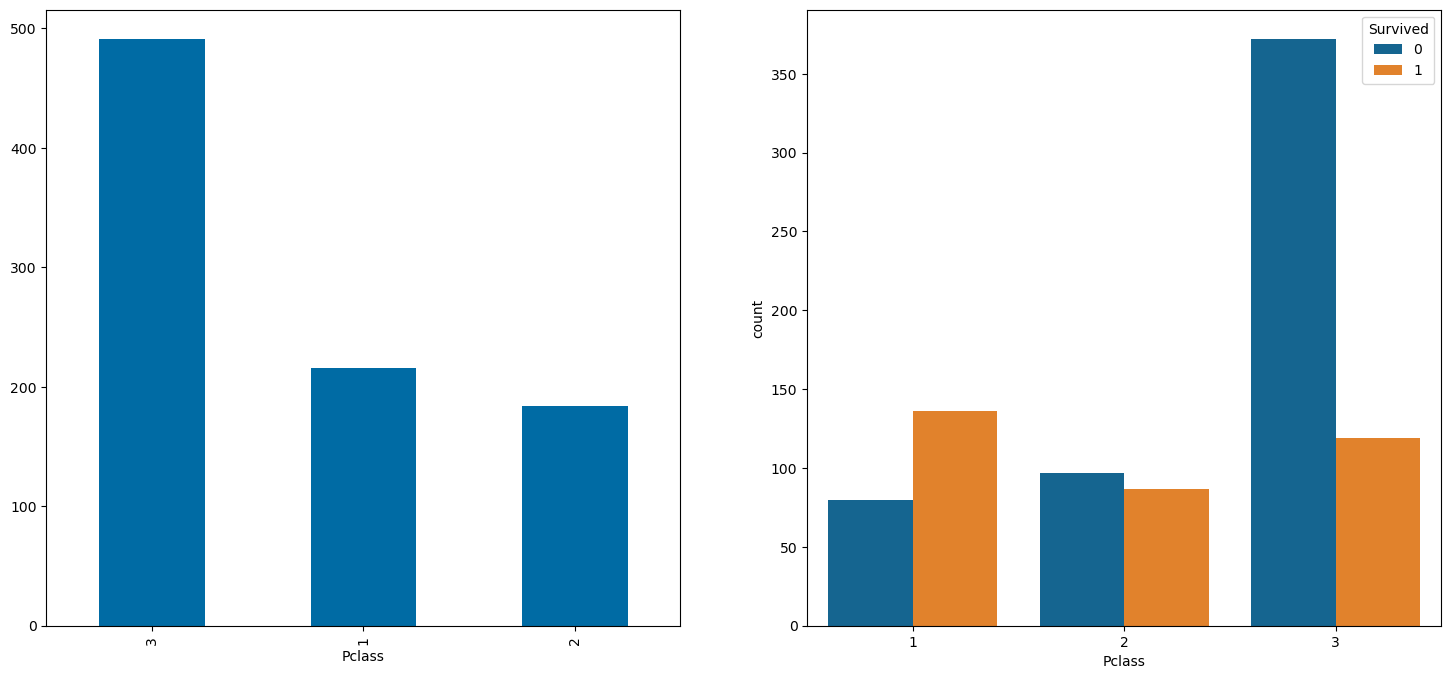

In [14]:
f,ax=plt.subplots(1,2,figsize=(18,8))
df["Pclass"].value_counts().plot.bar(ax=ax[0])
sns.countplot(x="Pclass",hue="Survived",data=df,ax=ax[1])

In [15]:
pd.crosstab([df.Sex,df.Survived],df.Pclass,margins=True)

Pclass             1    2    3  All
Sex    Survived                    
female 0           3    6   72   81
       1          91   70   72  233
male   0          77   91  300  468
       1          45   17   47  109
All              216  184  491  891

C:\Users\yaris\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


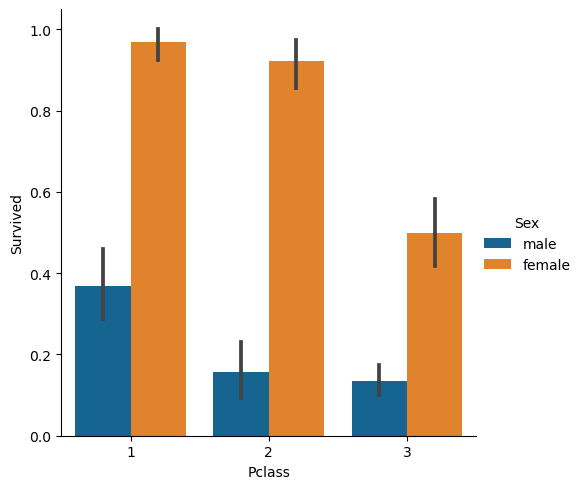

In [16]:
sns.catplot(x='Pclass', y='Survived', hue='Sex', kind='bar', data=df)
plt.show()


continues features

In [17]:
print('Oldest Passenger was of:',df['Age'].max(),'Years')
print('Youngest Passenger was of:',df['Age'].min(),'Years')
print('Average Age on the ship:',df['Age'].mean(),'Years')

Oldest Passenger was of: 80.0 Years
Youngest Passenger was of: 0.42 Years
Average Age on the ship: 29.69911764705882 Years


<Axes: xlabel='Pclass', ylabel='Age'>

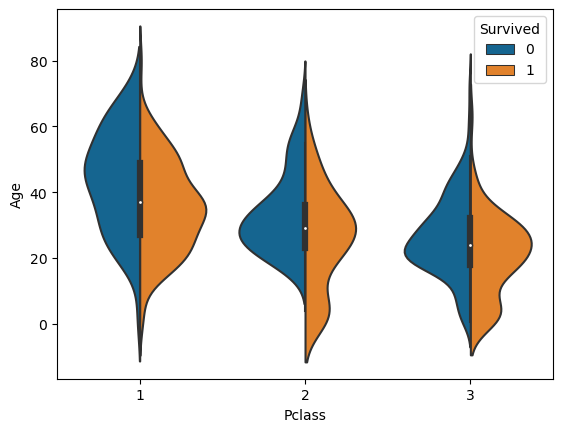

In [18]:
sns.violinplot(x="Pclass",y="Age",hue="Survived" ,data=df,split=True)

In [19]:
df['Initial']=0
for i in df:
    df['Initial']=df.Name.str.extract('([A-Za-z]+)\.')

In [20]:
pd.crosstab(df.Sex,df.Initial)

Initial,Capt,Col,Countess,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir
Sex,,,,,,,,,,,,,,,,,
female,0,0,1,0,1,0,1,0,0,182,2,1,0,125,1,0,0
male,1,2,0,1,6,1,0,2,40,0,0,0,517,0,0,6,1


In [21]:
df['Initial'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don'],
                        ['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr'],inplace=True)


In [22]:
df.groupby('Initial')['Age'].mean()

Initial
Master     4.574167
Miss      21.860000
Mr        32.739609
Mrs       35.981818
Other     45.888889
Name: Age, dtype: float64

In [23]:
df.loc[(df.Age.isnull())&(df.Initial=='Mr'),'Age']=33
df.loc[(df.Age.isnull())&(df.Initial=='Mrs'),'Age']=36
df.loc[(df.Age.isnull())&(df.Initial=='Master'),'Age']=5
df.loc[(df.Age.isnull())&(df.Initial=='Miss'),'Age']=22
df.loc[(df.Age.isnull())&(df.Initial=='Other'),'Age']=46


C:\Users\yaris\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


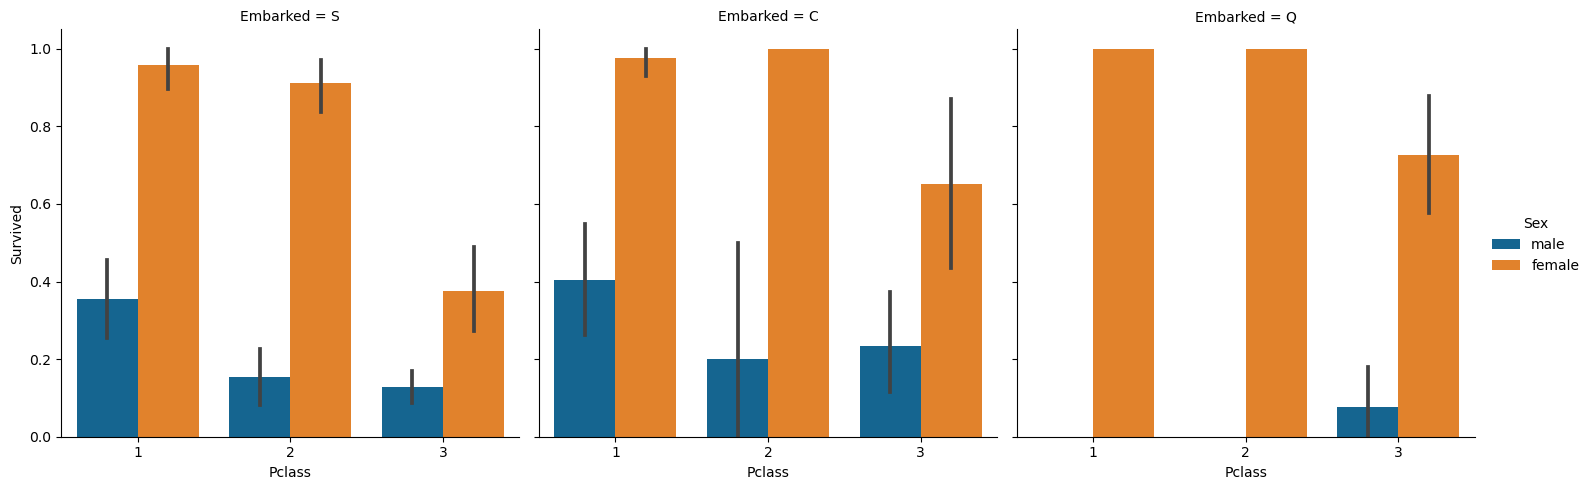

In [25]:
sns.catplot(x='Pclass',y='Survived',hue='Sex',col='Embarked',data=df,kind='bar')


In [26]:
df['Embarked'].fillna('S',inplace=True)


In [27]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
Initial          0
dtype: int64

In [28]:
df=df.drop(columns=["Cabin"])

In [29]:
df_encoded.info()

NameError: name 'df_encoded' is not defined

In [35]:
df2=df_encoded.drop(columns=['PassengerId','Name'])

In [36]:
x

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [37]:
x=df.drop(columns=["Survived","Name","PassengerId","Ticket"])
y=df["Survived"]

In [38]:
cat_features=["Sex","Embarked","Initial"]

In [39]:
df["SibSP"]

KeyError: 'SibSP'

In [40]:
for cat in cat_features:
    v=df[cat].unique().sum()
    print(cat,"=",v)

Sex = malefemale
Embarked = SCQ
Initial = MrMrsMissMasterOther


In [41]:
from sklearn.preprocessing import OneHotEncoder

In [42]:
df_encoded = pd.get_dummies(df, columns=['Sex'], prefix=['Sex'])


In [43]:
df_encoded = pd.get_dummies(df, columns=["Sex","Embarked","Initial"], prefix=["Sex","Embarked","Initial"])


In [32]:
sem=df_encoded.sample(5)
print(sem)

     PassengerId  Survived  Pclass                          Name   Age  SibSp  \
886          887         0       2         Montvila, Rev. Juozas  27.0      0   
767          768         0       3            Mangan, Miss. Mary  30.5      0   
257          258         1       1          Cherry, Miss. Gladys  30.0      0   
865          866         1       2      Bystrom, Mrs. (Karolina)  42.0      0   
58            59         1       2  West, Miss. Constance Mirium   5.0      1   

     Parch      Ticket   Fare  Sex_female  Sex_male  Embarked_C  Embarked_Q  \
886      0      211536  13.00       False      True       False       False   
767      0      364850   7.75        True     False       False        True   
257      0      110152  86.50        True     False       False       False   
865      0      236852  13.00        True     False       False       False   
58       2  C.A. 34651  27.75        True     False       False       False   

     Embarked_S  Initial_Master  Initi

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
 11  Initial      891 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [45]:
print(df["Sex"].unique())
print(df["Embarked"].unique())
print(df["Initial"].unique())


['male' 'female']
['S' 'C' 'Q']
['Mr' 'Mrs' 'Miss' 'Master' 'Other']


In [46]:
print(pd.__version__)

2.0.3


In [47]:
x_split=df2.iloc[:,1:]
y_split=df2["Survived"]

In [48]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_split,y_split,test_size=0.2,random_state=43)

In [49]:
x_train.drop(columns=["Ticket"],inplace=True)

In [50]:
x_test.drop(columns=["Ticket"],inplace=True)

In [51]:
from sklearn.preprocessing import StandardScaler 
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(x_train)
x_test_scales=scaler.transform(x_test)


In [52]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [53]:
models={
"LogisticRegression": LogisticRegression()
," DecisionTreeClassifier":DecisionTreeClassifier(),
    "RandomForestClassifier":RandomForestClassifier()
    ,"SVC":SVC()
}

In [54]:
for name, model in models.items():
    model.fit(X_train_scaled,y_train)

In [60]:
from sklearn.metrics import accuracy_score

In [61]:
for name, model in models.items():
    y_pred = model.predict(x_test_scales)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy of {name}: {accuracy * 100:.2f}%")

Accuracy of LogisticRegression: 78.77%
Accuracy of  DecisionTreeClassifier: 77.09%
Accuracy of RandomForestClassifier: 79.33%
Accuracy of SVC: 78.77%


In [62]:
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc


In [63]:
for name, model in models.items():
    y_pred = model.predict(x_test_scales)
    cm = confusion_matrix(y_test, y_pred)
    print(f"Confusion Matrix for {name}:")
    print(cm)


Confusion Matrix for LogisticRegression:
[[96 14]
 [24 45]]
Confusion Matrix for  DecisionTreeClassifier:
[[94 16]
 [25 44]]
Confusion Matrix for RandomForestClassifier:
[[101   9]
 [ 28  41]]
Confusion Matrix for SVC:
[[98 12]
 [26 43]]


In [64]:
from sklearn.metrics import precision_score,f1_score,recall_score 

In [65]:
for name,model in models.items():
    y_pred=model.predict(x_test_scales)
    precision=precision_score(y_test,y_pred)
    recall=recall_score(y_test,y_pred)
    f1=f1_score(y_test,y_pred)
    print(f"{name}:")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1 Score: {f1:.2f}\n")

LogisticRegression:
Precision: 0.76
Recall: 0.65
F1 Score: 0.70

 DecisionTreeClassifier:
Precision: 0.73
Recall: 0.64
F1 Score: 0.68

RandomForestClassifier:
Precision: 0.82
Recall: 0.59
F1 Score: 0.69

SVC:
Precision: 0.78
Recall: 0.62
F1 Score: 0.69



In [68]:
from sklearn.model_selection import cross_val_score

In [70]:
x=df2.iloc[:,1:]
y=df2["Survived"]
x.drop(columns=["Ticket"],inplace=True)

In [71]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler

pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('model', model) 
])

for name, model in models.items():
    pipe.steps[1] = ('model', model)
    
    scores = cross_val_score(pipe, x, y, cv=5)
    
    print(f"Cross-validation scores for {name}: {scores}")
    print(f"Mean cross-validation score for {name}: {scores.mean()}")



Cross-validation scores for LogisticRegression: [0.83798883 0.82022472 0.79775281 0.80898876 0.87640449]
Mean cross-validation score for LogisticRegression: 0.8282719226664993
Cross-validation scores for  DecisionTreeClassifier: [0.76536313 0.76966292 0.80898876 0.75842697 0.78651685]
Mean cross-validation score for  DecisionTreeClassifier: 0.7777917268219194
Cross-validation scores for RandomForestClassifier: [0.7877095  0.79213483 0.85955056 0.75842697 0.84269663]
Mean cross-validation score for RandomForestClassifier: 0.8081036971941498
Cross-validation scores for SVC: [0.82681564 0.8258427  0.8258427  0.7752809  0.87640449]
Mean cross-validation score for SVC: 0.8260372857949909


In [72]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Define the hyperparameters
hyperparameters = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_depth': [5, 10, 15, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize a Random Forest classifier object
rf = RandomForestClassifier()

# Initialize the GridSearchCV object with 5-fold cross validation
clf = GridSearchCV(rf, hyperparameters, cv=5)

# Fit the model on the data
clf.fit(X_train_scaled,y_train)

# Get the best parameters
best_params = clf.best_params_


In [73]:
best_params

{'max_depth': 5,
 'min_samples_leaf': 4,
 'min_samples_split': 10,
 'n_estimators': 100}

In [74]:
rfh = RandomForestClassifier(max_depth= 5,
 min_samples_leaf= 4,
 min_samples_split= 10,
 n_estimators = 100)


In [75]:
rfh.fit(X_train_scaled,y_train)


RandomForestClassifier(max_depth=5, min_samples_leaf=4, min_samples_split=10)

In [77]:
import pickle

with open('titanic.pkl', 'wb') as file:
    pickle.dump(rfh, file)

with open('titanic.pkl', 'rb') as file:
    loaded_model = pickle.load(file)
